# Ham and Spam Mail Classification

<h3>Objective</h3>
This dataset is created for classifying mails between Legit and .

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [18]:
messages = pd.read_csv('spam1.csv', encoding = 'cp1252')

In [19]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [21]:
messages.shape

(6776, 5)

In [22]:
messages = messages.iloc[:,[0,1]]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
messages.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)

In [24]:
messages.label = messages.label.replace({'ham':0, 'spam':1})
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
messages.message = messages.message.str.lower()
messages.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# before creating the TDM i have converted by data in small case
# lets also get rid of stop and also piunctuations

In [30]:
#import nltk
#nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRIME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
# we have only seen the stopwords, we have not  removed them

In [34]:
from nltk.corpus import stopwords
import string

def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char  not   in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [36]:
example = " this is just and example to @ show ! that its removes the stop words and also punctuations"

In [ ]:
# string.punctuation          contains only punctuations
# stopwords.words('english')  contains only stopwords

In [37]:
# this is done for explanination purpose
#messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [40]:
messages.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# lets build our tdm
# before u build the tdm u need to get the count of the words

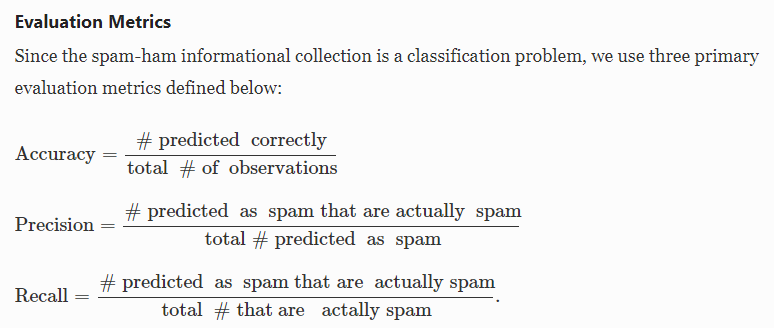

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages["message"])

In [42]:
# bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [45]:
len(bow_transformer.vocabulary_)
# count of total vocabulary means that no. of cols are created

9422

In [46]:
messages_bow = bow_transformer.transform(messages.message) # we now build a TDM(term density matrix)

In [47]:
messages_bow.shape

(6776, 9422)

In [48]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [49]:
messages_bow

<6776x9422 sparse matrix of type '<class 'numpy.int64'>'
	with 60614 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(messages_bow, messages.label)

In [51]:
print(x_train.shape)
print(y_train.shape)

(5082, 9422)
(5082,)


In [52]:
print(x_test.shape)
print(y_test.shape)

(1694, 9422)
(1694,)


In [53]:
from sklearn.naive_bayes import MultinomialNB

nb_spam = MultinomialNB()

In [54]:
nb_spam.fit(x_train, y_train)

MultinomialNB()

In [55]:
pred = nb_spam.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix

tab1 = confusion_matrix(y_test, pred)
tab1

array([[1425,   26],
       [  19,  224]], dtype=int64)

In [58]:
tab1.diagonal().sum() / tab1.sum()

0.973435655253837

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
dt_pred = dt.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix

tab1 = confusion_matrix(y_test, dt_pred)
tab1

array([[1437,   14],
       [  38,  205]], dtype=int64)

# Random Forest Implementation

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
rf_pred = rf.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix

tab1 = confusion_matrix(y_test, rf_pred)
tab1

array([[1451,    0],
       [  37,  206]], dtype=int64)

In [72]:
tab1.diagonal().sum() / tab1.sum()

0.9781582054309327

# WordCloud

In [81]:
# Visual interpreation of a word document

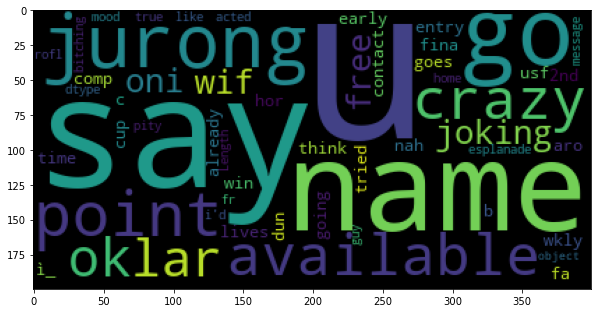

In [83]:
from wordcloud import WordCloud  

cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 100).generate(str(messages['message']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)


In [84]:
# lets build word cloud only on spm emails and only on ham emails

In [ ]:
# HAM : 0, SPAN=M:1

In [88]:
ham_df = messages[messages.label == 0]
spam_df = messages[messages.label == 1]

In [86]:
span_df.shape

(5854, 2)

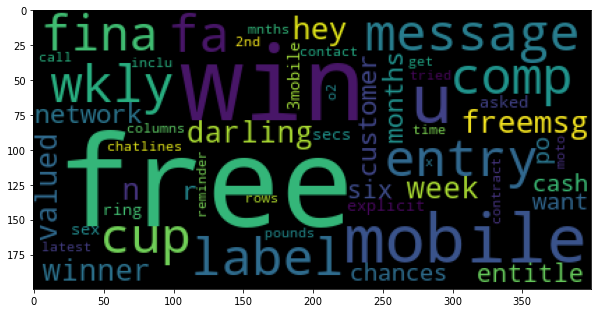

In [90]:
cloud_spam  = WordCloud(stopwords = stopwords.words("english"), max_words= 100).generate(str(spam_df) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud_spam)

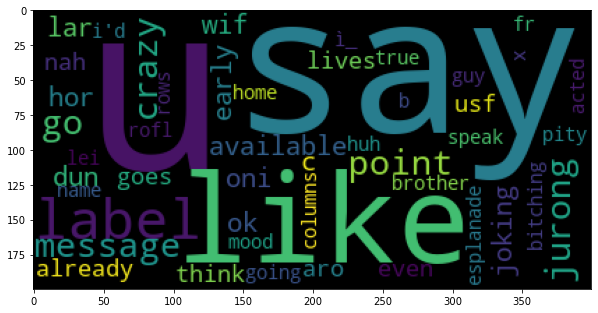

In [91]:
cloud_ham  = WordCloud(stopwords = stopwords.words("english"), max_words= 100).generate(str(ham_df) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud_ham)